In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the Train set
train_set = pd.read_csv("titanic/train.csv")
train_set.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [3]:
#Load the Test set
test_set = pd.read_csv("titanic/test.csv")
test_set.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
# inspect the structure etc.
print(train_set.info(), "\n")
print(train_set.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

(891, 12)


In [5]:
print(test_set.info(), "\n")
print(test_set.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None 

(418, 11)


In [6]:
train_set['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
# missing values in Train set df
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
round(100*(test_set.isnull().sum().sort_values(ascending=False)/len(test_set.index)), 2)

Cabin          78.23
Age            20.57
Fare            0.24
Embarked        0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
PassengerId     0.00
dtype: float64

In [9]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(train_set.isnull().sum().sort_values(ascending=False)/len(train_set.index)), 2)

Cabin          77.10
Age            19.87
Embarked        0.22
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
Survived        0.00
PassengerId     0.00
dtype: float64

##### As we can see above Cabin and Age have maximum chunk of missing values. So we need to check or get inference for them to imput with some values

In [10]:
train_set.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Lets first use Name colums to drive the new Title columns which can be helpful in idea of age by grouping them

In [11]:
train_set['Title']=train_set['Name'].map(lambda x: x.split(',')[1].split('.')[0].lstrip())
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [12]:
train_set['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Sir               1
Ms                1
Capt              1
Jonkheer          1
Don               1
Lady              1
the Countess      1
Mme               1
Name: Title, dtype: int64

###### we can see there are unnecessary catogories for Dr, Major and and some title for male as sir and Don and etc. Lets keep four categories only Mr., Miss. , Mrs, train_set

In [13]:
print(train_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None


In [14]:
#Check the list of values in title column
train_set.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [15]:
# lets sort the remaining other categories in title to various sub category of Mr, Miss, mrs, train_set
title_list=['Mrs', 'Mr', 'Master', 'Miss']
train_set.loc[~train_set['Title'].isin(title_list),['Age','Sex','Title']]

,Age,Sex,Title
30,40.0,male,Don
149,42.0,male,Rev
150,51.0,male,Rev
245,44.0,male,Dr
249,54.0,male,Rev
317,54.0,male,Dr
369,24.0,female,Mme
398,23.0,male,Dr
443,28.0,female,Ms
449,52.0,male,Major


From the above we can categorize as below
1. Don, major, Capt,Jonkheer, Rev, Col as MR as Sex=Male and age is also greater that 30.
2. Countess, MMe can be categorized as Mrs as sex = Female and age is greater than 30
3. Mlle, Ms as Miss because sex=Female, age<30
4. Dr will be categorized into Mr and Mrs on the basis of Sex


In [16]:
# function to bucket other titles into major 4
def fix_title(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col','Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme','Lady','Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [17]:
train_set['Title']=train_set.apply(fix_title, axis=1)
train_set['Title'].value_counts()

Mr        531
Miss      185
Mrs       135
Master     40
Name: Title, dtype: int64

In [18]:
train_set.Age.isnull().sum()

177

### Missing Value treatment

###### Age

In [19]:
#Check mean  on title Subclass w.r.t Age
train_set.groupby(['Title'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Master,36.0,4.574167,3.619872,0.42,1.0,3.5,8.0,12.0
Miss,149.0,21.845638,12.870542,0.75,14.5,21.0,30.0,63.0
Mr,412.0,32.891990,12.977610,11.00,23.0,30.0,40.0,80.0
Mrs,117.0,36.188034,11.454506,14.00,28.0,35.0,45.0,63.0


This excerice of checking mean, median into subclass is important as it will help in decision on imputing Null values on Age as title give relative information on Age

In [20]:
train_set.groupby(['Title'])['Age'].median()

Title
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Name: Age, dtype: float64

1. Master Class have Age mean 4.57 and median 3.5
2. Miss Class have Age mean and median approx 21.0
3. Mr. Class have Age mean 32 and median 30
4. Mrs class have Age mean 36 and median 35. 

So Mean and Median are very close by on all the values so lets impute the missing values in Age with Median

In [21]:
round(100*(train_set.isnull().sum().sort_values(ascending=False)/len(train_set.index)), 2)

Cabin          77.10
Age            19.87
Embarked        0.22
Title           0.00
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Sex             0.00
Name            0.00
Pclass          0.00
Survived        0.00
PassengerId     0.00
dtype: float64

In [22]:
# Total Nullvalues in Age Column
train_set.Age.isnull().sum()

177

In [23]:
print('Value of Master Class with Null Values {other}'.format(other=train_set.loc[(train_set.Title=='Master'),['Age']].isnull().sum()))
print('Value of Miss Class with Null Values {other}'.format(other=train_set.loc[(train_set.Title=='Miss'),['Age']].isnull().sum()))
print('Value of Mrs Class with Null Values {other}'.format(other=train_set.loc[(train_set.Title=='Mrs'),['Age']].isnull().sum()))
print('Value of Mr Class with Null Values {other}'.format(other=train_set.loc[(train_set.Title=='Mr'),['Age']].isnull().sum()))

Value of Master Class with Null Values Age    4
dtype: int64
Value of Miss Class with Null Values Age    36
dtype: int64
Value of Mrs Class with Null Values Age    18
dtype: int64
Value of Mr Class with Null Values Age    119
dtype: int64


In [24]:
train_set.loc[(train_set.Title=='Master'),['Age']].isnull().sum()

Age    4
dtype: int64

In [25]:
#Impute Missing values in Age Column
master_median=train_set.loc[(train_set.Title=='Master') & ~(train_set.Age.isnull()),['Age']].median(axis=0, skipna=True).astype('float')
mr_median=train_set.loc[(train_set.Title=='Mr') & ~(train_set.Age.isnull()),['Age']].median(axis=0, skipna=True).astype('float')
miss_median=train_set.loc[(train_set.Title=='Miss') & ~(train_set.Age.isnull()),['Age']].median(axis=0, skipna=True).astype('float')
mrs_median=train_set.loc[(train_set.Title=='Mrs') & ~(train_set.Age.isnull()),['Age']].median(axis=0, skipna=True).astype('float')

In [26]:
train_set.loc[(train_set.Title=='Master') & (train_set.Age.isnull()),'Age']=train_set.loc[(train_set.Title=='Master') & (train_set.Age.isnull()),'Age'].replace(np.nan,master_median.median())
train_set.loc[(train_set.Title=='Miss') & (train_set.Age.isnull()),'Age']=train_set.loc[(train_set.Title=='Miss') & (train_set.Age.isnull()),'Age'].replace(np.nan,miss_median.median())
train_set.loc[(train_set.Title=='Mrs') & (train_set.Age.isnull()),'Age']=train_set.loc[(train_set.Title=='Mrs') & (train_set.Age.isnull()),'Age'].replace(np.nan,mrs_median.median())
train_set.loc[(train_set.Title=='Mr') & (train_set.Age.isnull()),'Age']=train_set.loc[(train_set.Title=='Mr') & (train_set.Age.isnull()),'Age'].replace(np.nan,mr_median.median())

In [30]:
# After Imputation on Age Colums verify the null values
train_set.Age.isnull().sum()

0

In [31]:
# Again summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(train_set.isnull().sum().sort_values(ascending=False)/len(train_set.index)), 2)

Cabin          77.10
Embarked        0.22
Title           0.00
Fare            0.00
Ticket          0.00
Parch           0.00
SibSp           0.00
Age             0.00
Sex             0.00
Name            0.00
Pclass          0.00
Survived        0.00
PassengerId     0.00
dtype: float64

Now Only Cabin have massive chunk 
and Very few in Embarked have the missing values. We need to find pattern in Cabin and for Embarked we can remove and impute from Median

#### Cabin

In [37]:
# GEt the unique set of Value of Cabin
train_set.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [47]:
train_set.Cabin.isnull().sum()

687

In [52]:
# Lets see the cabin with passenger class
class_cabin=train_set.groupby(['Pclass'])['Cabin'].count()
class_cabin

Pclass
1    176
2     16
3     12
Name: Cabin, dtype: int64

In [61]:
# No Pclass
train_set.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [54]:
print('Value of 1st passenger Class with Null Values {other}'.format(other=train_set.loc[(train_set.Pclass==1),['Cabin']].isnull().sum()))
print('Value of 2nd passenger Class with Null Values {other}'.format(other=train_set.loc[(train_set.Pclass==2),['Cabin']].isnull().sum()))
print('Value of 3rd passenger Class with Null Values {other}'.format(other=train_set.loc[(train_set.Pclass==3),['Cabin']].isnull().sum()))


Value of 1st passenger Class with Null Values Cabin    40
dtype: int64
Value of 2nd passenger Class with Null Values Cabin    168
dtype: int64
Value of 3rd passenger Class with Null Values Cabin    479
dtype: int64


In [59]:
train_set.loc[(train_set.Pclass==1) & ~(train_set.Cabin.isnull()),['Cabin']]

,Cabin
1,C85
3,C123
6,E46
11,C103
23,A6
...,...
871,D35
872,B51 B53 B55
879,C50
887,B42


 We Can see the Cabin list is not giving much information and every Class of Passanger have some missing values. We can see from the above few Steps that PClass 3 is lower class have highest missing values.
 1. 1st Class have most popluated have given the Cabin # and can say the First letter is the kind of Deck# as we have in Ships for ex A, C, B, T, D, E
 2. Same as in rest of the class we can relate that if there is Cabin List no is there so particulary assigned then is attached to some deck and for other cases where cabin # is Null we can say it as General/ unkwnown. Let say it GNR(general).

In [86]:
# Lets have Deck # as separte Columns and null as GNR
pd.Series(train_set.loc[(train_set.Pclass==1) & ~(train_set.Cabin.isnull()),['Cabin']].values.flatten()).astype('str').str[0]

0      C
1      C
2      E
3      C
4      A
      ..
171    D
172    B
173    C
174    B
175    C
Length: 176, dtype: object

In [88]:
# Lets have Deck # as separte Columns and null as GNR
train_set['Deck']=pd.Series(train_set.loc[~(train_set.Cabin.isnull()),['Cabin']].values.flatten()).astype('str').str[0]

In [89]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,C


In [90]:
# Lets see the unique value and count of Deck Column
train_set['Deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

In [92]:
train_set.Deck.unique()

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T', nan], dtype=object)

In [93]:
train_set.Deck.isnull().sum()

687

Lets make the DECK Nan values as GNR. The null values count is same as Cabin

In [94]:
# REplace Nan in Decek to GNR
train_set.loc[(train_set.Deck.isnull()),'Deck']=train_set.loc[ (train_set.Deck.isnull()),'Deck'].replace(np.nan,'GNR')
train_set.Deck.isnull().sum()

0

Now we can remove the Cabin columns as the information noew can be checked and inferred from Deck Column

In [96]:
# Remove Cabin Column
train_set.drop('Cabin',axis=1,inplace=True)

In [97]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,C


In [98]:
# Now lets check the column with null values
train_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
Deck           0
dtype: int64

Now only 2 records in Embarked have null values. We can either remove them as very less in no or we can replace with value of Max counts of category 

In [103]:
# Value of Embarked on various categories
train_set.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [104]:
train_set.Embarked.isnull().sum()

2

In [105]:
#Lets impute 2 null records of Embarked with value 'S' as it have max occurance
train_set.loc[(train_set.Embarked.isnull()),'Embarked']=train_set.loc[ (train_set.Embarked.isnull()),'Embarked'].replace(np.nan,'S')
train_set.Embarked.isnull().sum()

0

In [106]:
# Check if any null columns are present
train_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
Deck           0
dtype: int64

Now there are no missing values present in the Data. Now Lets do plot some graphs to see distribution of columns and relationship between target variable

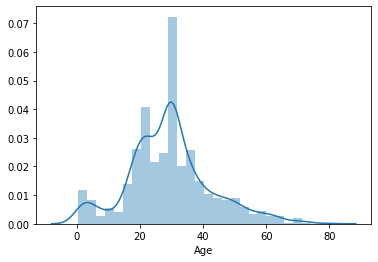

In [107]:
sns.distplot(train_set['Age'])

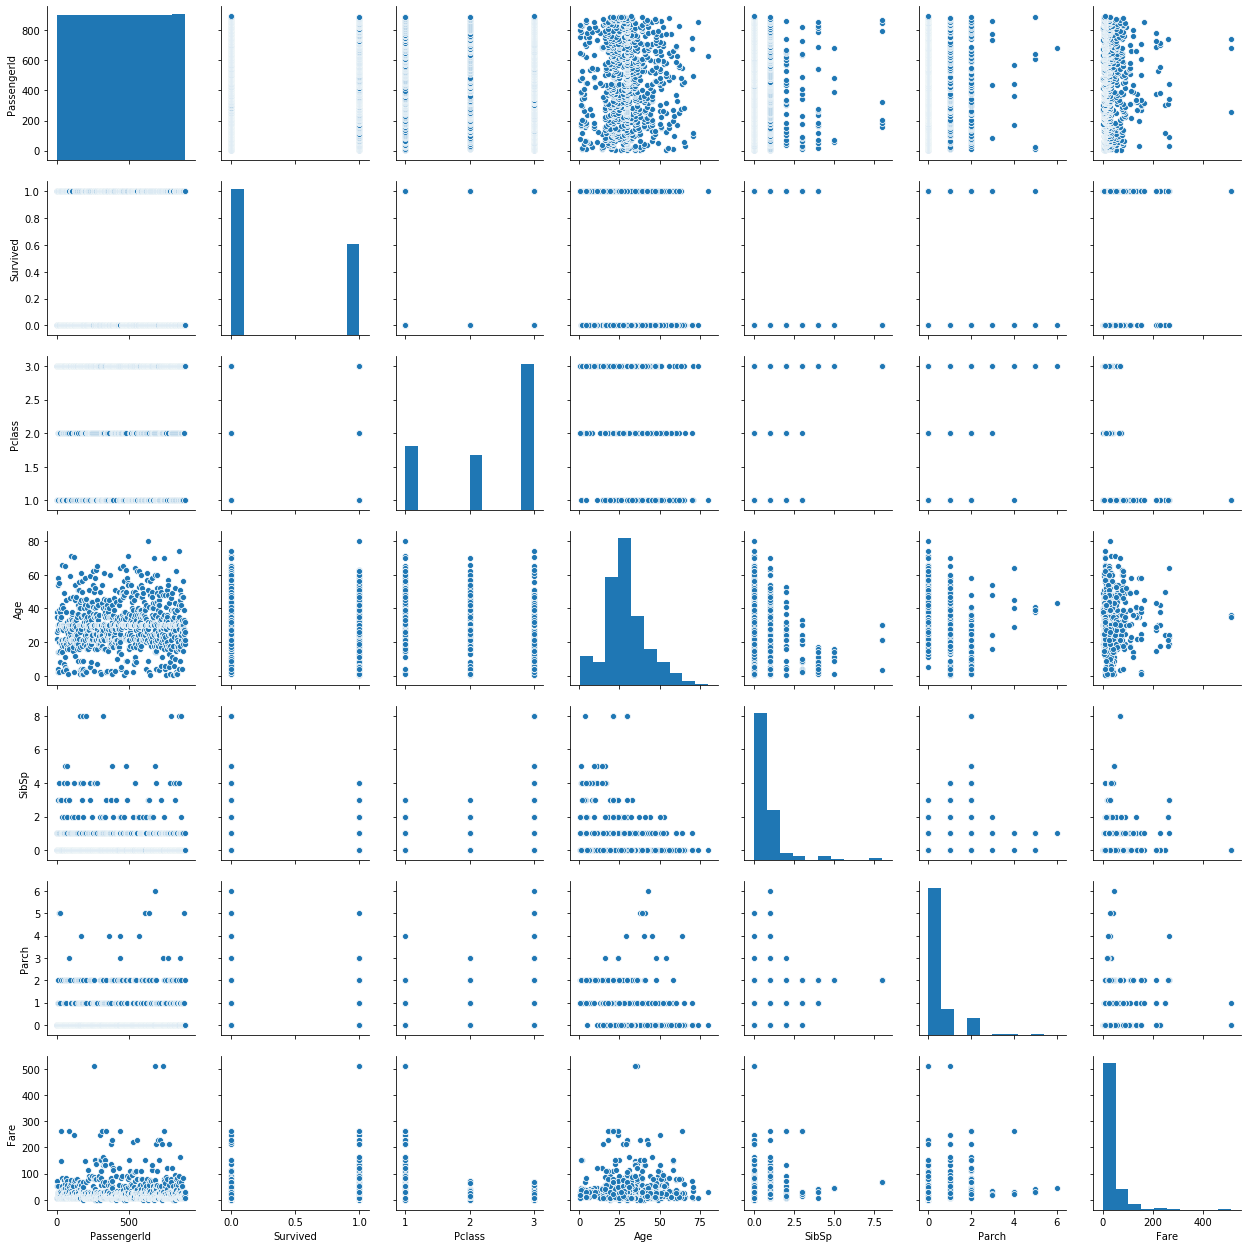

In [108]:
# pairplot
sns.pairplot(train_set)
plt.show()

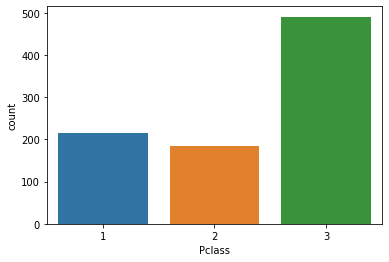

In [109]:
sns.countplot(x="Pclass", data=train_set)

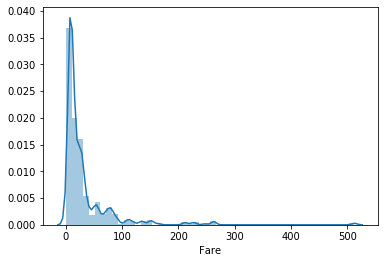

In [110]:
sns.distplot(train_set['Fare'])

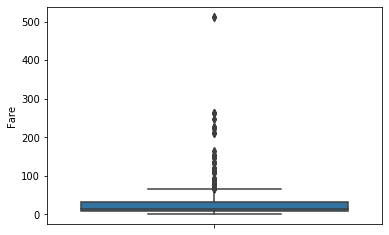

In [112]:
sns.boxplot(y=train_set['Fare'])